In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from misc import load_csv_dataset

In [2]:
data = load_csv_dataset("names_featured.csv")
df = pd.DataFrame(data)

>> Loading CSV dataset from names_featured.csv
>> Detected fieldnames: ['name', 'region', 'year', 'words', 'length', 'probable_native', 'probable_surname', 'sex']
>> Successfully loaded with UTF-8 encoding


In [3]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['words'] = pd.to_numeric(df['words'], errors='coerce')
df['length'] = pd.to_numeric(df['length'], errors='coerce')

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4418337.0,2017.038495,4.656899,2008.0,2013.0,2018.0,2021.0,2023.0
words,4418337.0,2.862385,0.473601,1.0,3.0,3.0,3.0,10.0
length,4418337.0,18.216613,3.498679,1.0,16.0,18.0,21.0,49.0


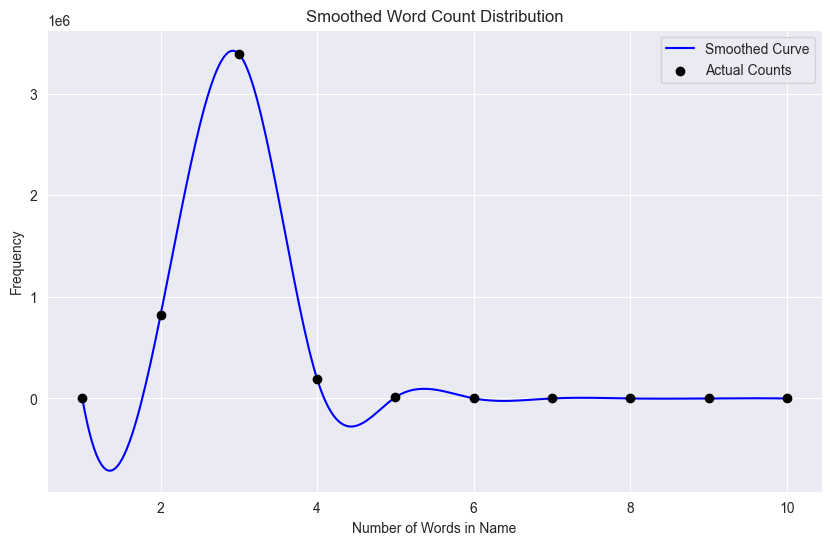

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.interpolate import make_interp_spline

# Step 1: Count frequencies
word_counts = df["words"].value_counts().sort_index()
x = word_counts.index.values       # distinct word counts
y = word_counts.values             # their frequencies

# Step 2: Create smoother X values (interpolation)
x_smooth = np.linspace(x.min(), x.max(), 300)
spline = make_interp_spline(x, y, k=3)  # cubic spline
y_smooth = spline(x_smooth)

# Step 3: Plot
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, y_smooth, color='blue', label='Smoothed Curve')
plt.scatter(x, y, color='black', zorder=5, label='Actual Counts')
plt.title("Smoothed Word Count Distribution")
plt.xlabel("Number of Words in Name")
plt.ylabel("Frequency")
plt.grid(True)
plt.legend()
plt.show()


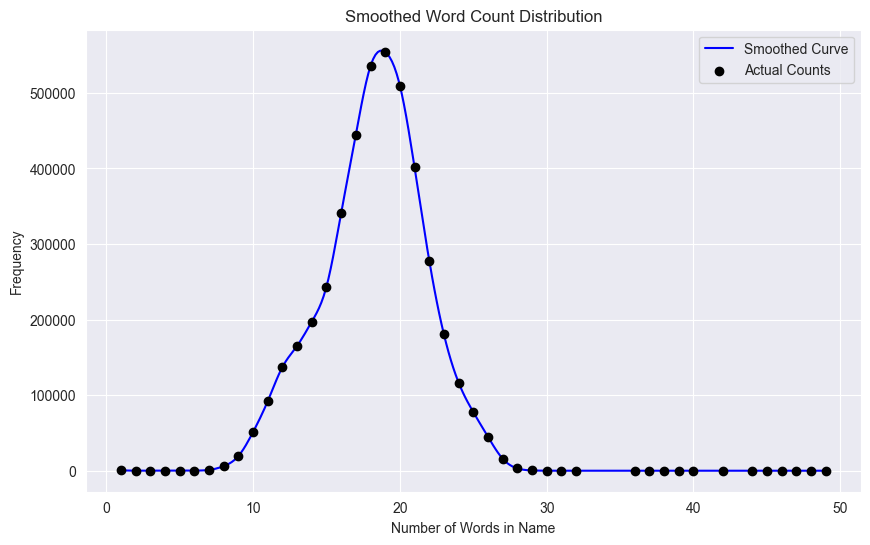

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.interpolate import make_interp_spline

# Step 1: Count frequencies
word_counts = df["length"].value_counts().sort_index()
x = word_counts.index.values       # distinct word counts
y = word_counts.values             # their frequencies

# Step 2: Create smoother X values (interpolation)
x_smooth = np.linspace(x.min(), x.max(), 300)
spline = make_interp_spline(x, y, k=3)  # cubic spline
y_smooth = spline(x_smooth)

# Step 3: Plot
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, y_smooth, color='blue', label='Smoothed Curve')
plt.scatter(x, y, color='black', zorder=5, label='Actual Counts')
plt.title("Smoothed Word Count Distribution")
plt.xlabel("Number of Words in Name")
plt.ylabel("Frequency")
plt.grid(True)
plt.legend()
plt.show()


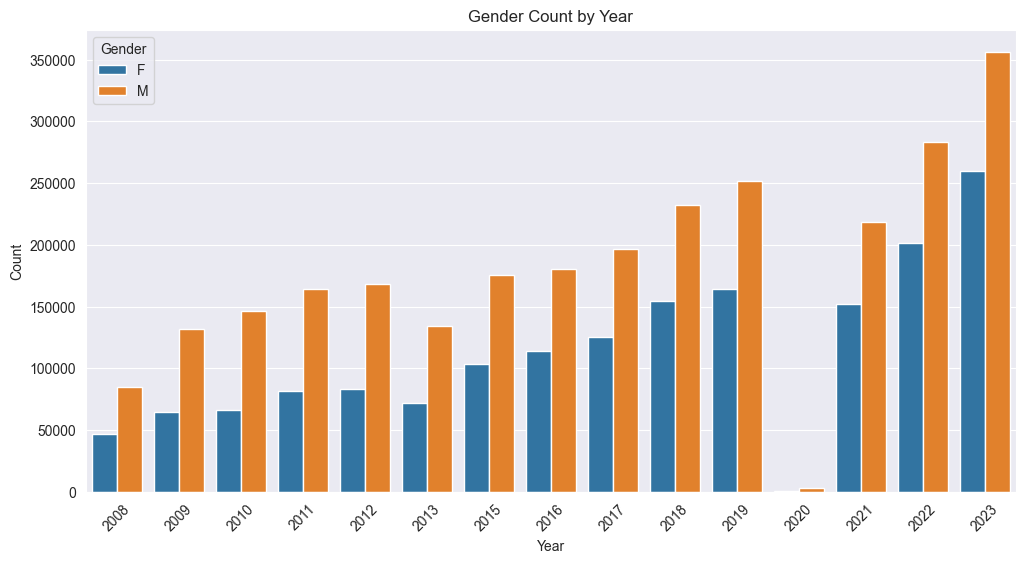

In [7]:
gender_by_year = df.groupby(['year', 'sex']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=gender_by_year, x='year', y='count', hue='sex')
plt.title('Gender Count by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()


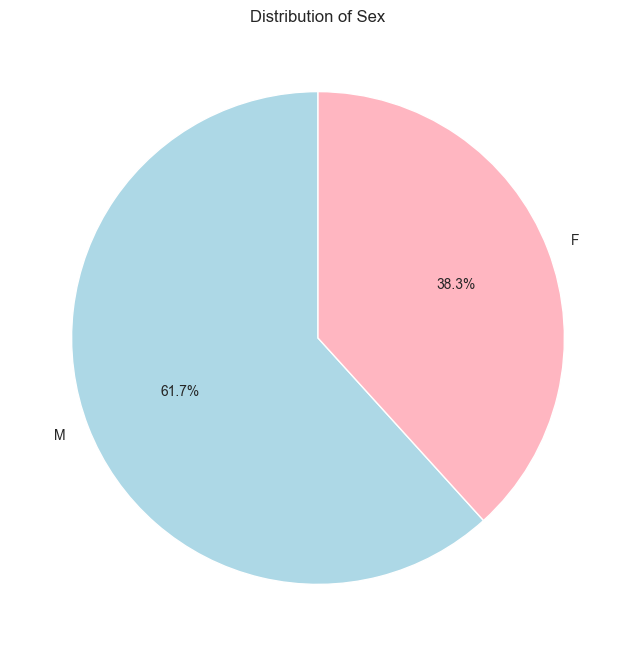

In [8]:
sex_counts = df['sex'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightpink'])
plt.title('Distribution of Sex')
plt.show()


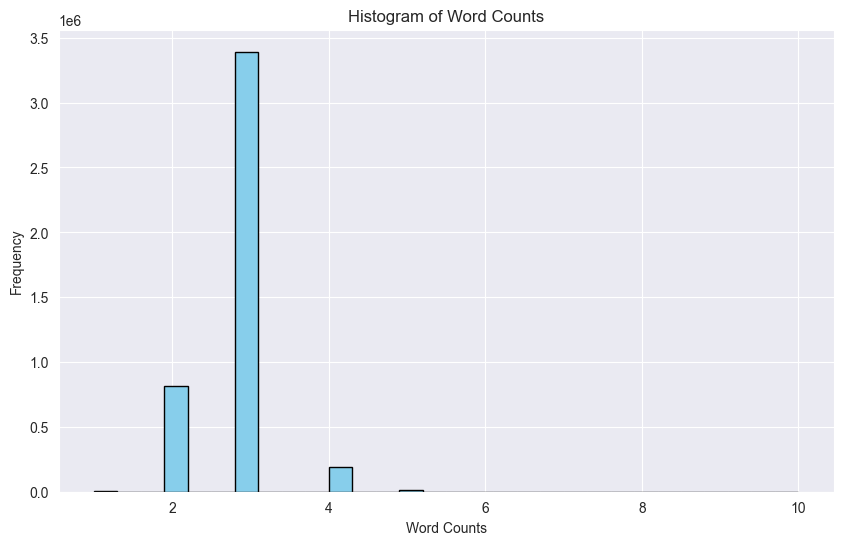

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(df['words'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Word Counts')
plt.xlabel('Word Counts')
plt.ylabel('Frequency')
plt.show()

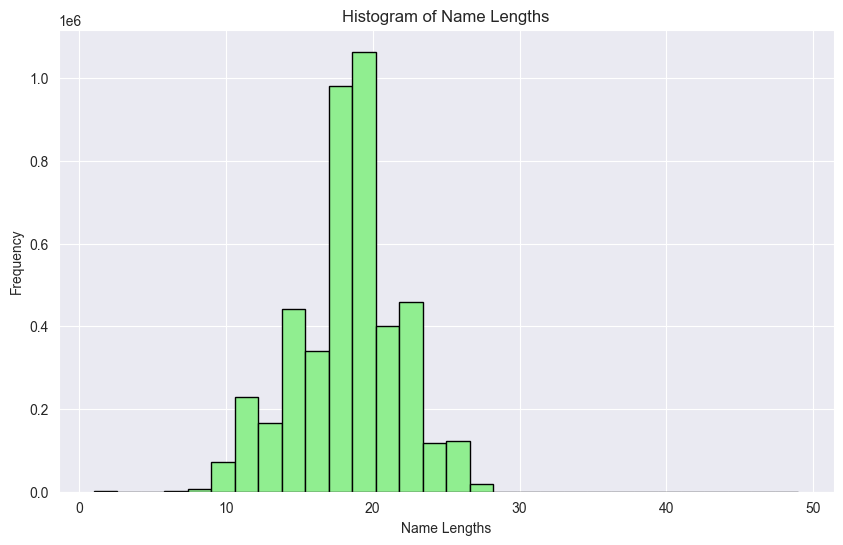

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(df['length'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Histogram of Name Lengths')
plt.xlabel('Name Lengths')
plt.ylabel('Frequency')
plt.show()

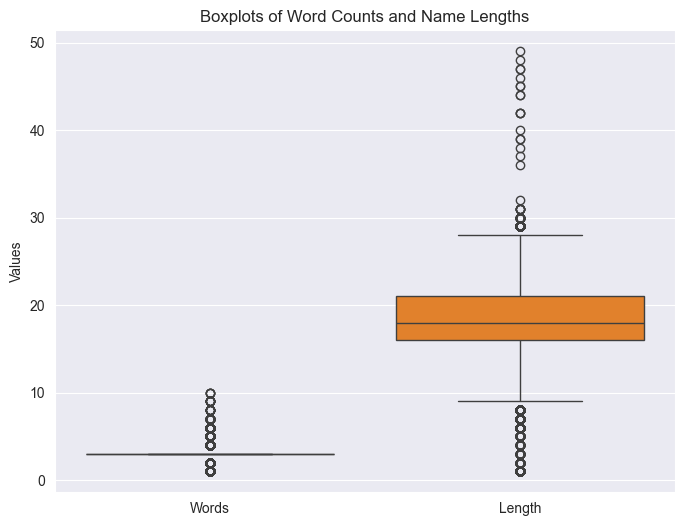

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['words', 'length']])
plt.title('Boxplots of Word Counts and Name Lengths')
plt.ylabel('Values')
plt.xticks(ticks=[0, 1], labels=['Words', 'Length'])
plt.show()

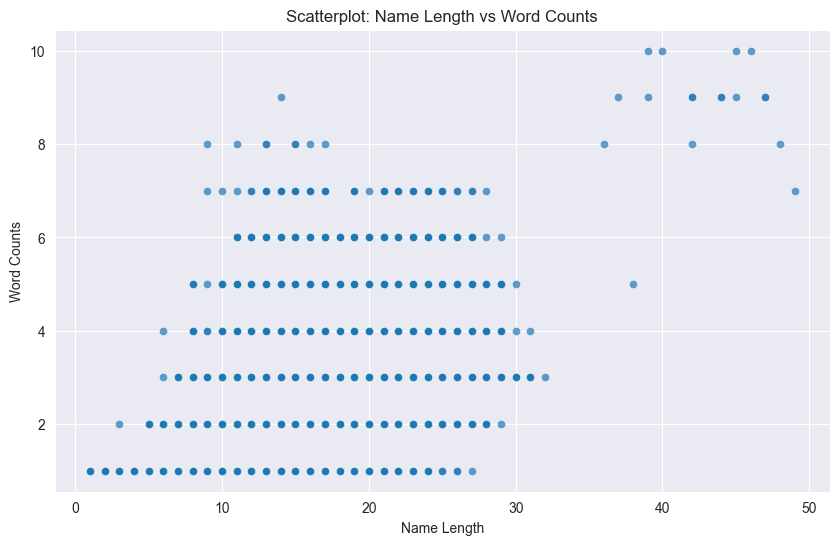

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='length', y='words', alpha=0.7)
plt.title('Scatterplot: Name Length vs Word Counts')
plt.xlabel('Name Length')
plt.ylabel('Word Counts')
plt.grid(True)
plt.show()
